In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [2]:
X = genfromtxt('toy_data.txt', delimiter=',')

In [28]:
xx = np.array(X)
print(xx)
XX = []
Y = []
for i in range(len(xx)):
    XX.append([xx[i][0],xx[i][1]])

for i in range(len(xx)):
    Y.append(xx[i][2])
    
x = np.array(XX)
y = np.array(Y)
print(x)
print(y)


[[ 8.  7.  1.]
 [ 4. 10.  1.]
 [ 9.  7.  1.]
 [ 7. 10.  1.]
 [ 9.  6.  1.]
 [ 4.  8.  1.]
 [10. 10.  1.]
 [ 2.  7. -1.]
 [ 8.  3. -1.]
 [ 7.  5. -1.]
 [ 4.  4. -1.]
 [ 4.  6. -1.]
 [ 1.  3. -1.]
 [ 2.  5. -1.]]
[[ 8.  7.]
 [ 4. 10.]
 [ 9.  7.]
 [ 7. 10.]
 [ 9.  6.]
 [ 4.  8.]
 [10. 10.]
 [ 2.  7.]
 [ 8.  3.]
 [ 7.  5.]
 [ 4.  4.]
 [ 4.  6.]
 [ 1.  3.]
 [ 2.  5.]]
[ 1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.]


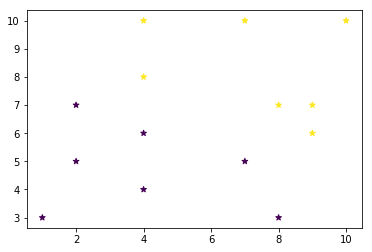

In [29]:
plt.scatter(x[:,0],x[:,1],marker='*',c=y) 
plt.show()

In [30]:
def LR(x,w):
    val=0
    for i,j in zip(x,w):
        val+=i*j
    return val

In [31]:
def act(val):
    return np.sign(val)

In [32]:
def prdt(X, w):
    hp=[]
    for i in x: 
        lr=LR(i,w)
        h=act(lr)
        hp.append(h)
    return hp

In [35]:
Xa= np.c_[np.ones(x.shape[0]), x]
print(Xa)
w = np.random.rand(3)
print(w)
py=prdt(Xa,w)
print(py)

[[ 1.  8.  7.]
 [ 1.  4. 10.]
 [ 1.  9.  7.]
 [ 1.  7. 10.]
 [ 1.  9.  6.]
 [ 1.  4.  8.]
 [ 1. 10. 10.]
 [ 1.  2.  7.]
 [ 1.  8.  3.]
 [ 1.  7.  5.]
 [ 1.  4.  4.]
 [ 1.  4.  6.]
 [ 1.  1.  3.]
 [ 1.  2.  5.]]
[0.31137397 0.63792265 0.60544698]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [140]:
def get_miss_indexes(py, y):
    miss=[]
    for i in range(len(y)):
        if py[i]!=y[i]:
            miss.append(i)
    return miss

In [141]:
miss=get_miss_indexes(py,y)
rnd=np.random.choice(miss)
print(rnd)
rx=Xa[rnd]
ry=y[rnd]
print(rx)
print(ry)

12
[1. 1. 3.]
-1.0


In [142]:
def perceptron_train(X, y):
    w = np.random.rand(3)
    py=predict(X,w)
    miss=get_miss_indexes(py,y) 
    while len(miss)>0:
        rnd=np.random.choice(miss)
        rx=X[rnd]
        ry=y[rnd]
        w=w+rx*ry
        
        py=predict(X,w)
        miss=get_miss_indexes(py,y)
        
    return w

In [143]:
w=perceptron_train(Xa,y)
print(w)

[-40.22270907   1.47049518   4.66545079]


In [144]:
py=predict(Xa,w)
print(py)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


In [149]:
px=[0, -w[0]/w[1] ] 
px2=[ -w[0]/w[2], 0 ]

print(px)
print(px2)

[0, 27.353173056485932]
[8.621398201428569, 0]


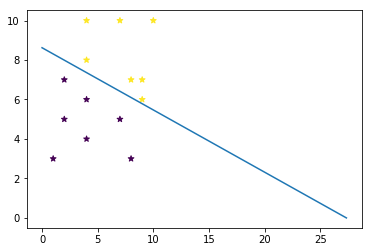

In [152]:
plt.scatter(x[:,0],x[:,1],marker='*', c=y)  
plt.plot(px, px2 )  
plt.show()

# Confusion Matrix (for accuracy)


In [153]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [156]:
r = confusion_matrix(y, py) 
print(r)

[[7 0]
 [0 7]]


In [157]:
def acu(a):
    return ((a[0][0]+a[1][1])/len(x))*100

Accuracy

In [158]:
ac = acu(r)
print(ac)

100.0
